In [1]:
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import arviz as az 
import numpy as np

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Exercise 1

In [2]:
N = 50
iter_sampling = 1000

In [3]:
gen_quant = CmdStanModel(stan_file='lab3_model_1.stan')
samples = gen_quant.sample(data={'N': N}, fixed_param=True, iter_sampling=iter_sampling)
samples_df = samples.draws_pd()
samples_df

INFO:cmdstanpy:compiling stan file /root/dupa/LAB_01/lab3_model_1.stan to exe file /root/dupa/LAB_01/lab3_model_1
INFO:cmdstanpy:compiled model executable: /root/dupa/LAB_01/lab3_model_1
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,y,p
0,0.0,0.0,7.0,0.226015
1,0.0,0.0,10.0,0.197847
2,0.0,0.0,14.0,0.211118
3,0.0,0.0,11.0,0.190660
4,0.0,0.0,11.0,0.197459
...,...,...,...,...
995,0.0,0.0,7.0,0.214845
996,0.0,0.0,8.0,0.210735
997,0.0,0.0,15.0,0.217307
998,0.0,0.0,8.0,0.185748


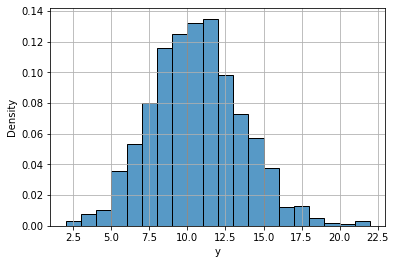

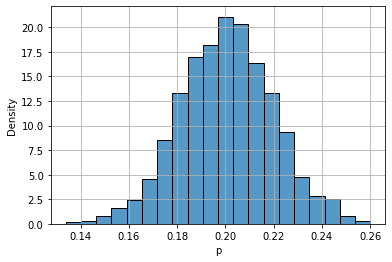

In [6]:
sns.histplot(data=samples_df, x='y', stat='density', bins=20)
plt.grid(True)
plt.show()

sns.histplot(data=samples_df, x='p', stat='density', bins=20)
plt.grid(True)
plt.show()

In [8]:
samples_df['veryfication'] = samples_df['y']/N
samples_df

,lp__,accept_stat__,y,p,veryfication
0,0.0,0.0,7.0,0.226015,0.14
1,0.0,0.0,10.0,0.197847,0.20
2,0.0,0.0,14.0,0.211118,0.28
3,0.0,0.0,11.0,0.190660,0.22
4,0.0,0.0,11.0,0.197459,0.22
...,...,...,...,...,...
995,0.0,0.0,7.0,0.214845,0.14
996,0.0,0.0,8.0,0.210735,0.16
997,0.0,0.0,15.0,0.217307,0.30
998,0.0,0.0,8.0,0.185748,0.16


In [9]:
mean_p = samples_df['p'].mean()
mean_veryfication = samples_df['veryfication'].mean()

print(f' p = {mean_p:.4f} \n p_verified = {mean_veryfication:.4f} \n difference = {abs(mean_p - mean_veryfication):.4f}')

 p = 0.2007 
 p_verified = 0.2021 
 difference = 0.0014


# Excercise 2

In [64]:
gen_quant = CmdStanModel(stan_file='lab3_model_2.stan')
samples = gen_quant.sample(data={'N': N, 'y': 5}, iter_sampling=iter_sampling)
samples_df = samples.draws_pd()
samples_df["Ratio"] = samples_df["y_pred"] / N
samples_df

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred,Ratio
0,-16.7870,0.948109,0.868395,1.0,3.0,0.0,17.3987,0.087813,2.0,0.04
1,-17.3835,0.922213,0.868395,2.0,3.0,0.0,17.5331,0.060836,5.0,0.10
2,-16.8309,0.984923,0.868395,1.0,3.0,0.0,17.3216,0.083934,5.0,0.10
3,-16.8201,1.000000,0.868395,1.0,1.0,0.0,16.8482,0.084807,2.0,0.04
4,-16.7381,0.998956,0.868395,1.0,3.0,0.0,16.8036,0.094229,5.0,0.10
...,...,...,...,...,...,...,...,...,...,...
3995,-16.7423,0.926225,0.934871,2.0,7.0,0.0,19.8700,0.093499,2.0,0.04
3996,-16.7336,1.000000,0.934871,1.0,1.0,0.0,16.7424,0.095104,2.0,0.04
3997,-16.7150,0.999700,0.934871,1.0,3.0,0.0,16.7331,0.101094,1.0,0.02
3998,-17.5046,0.902023,0.934871,2.0,3.0,0.0,17.5111,0.057796,4.0,0.08


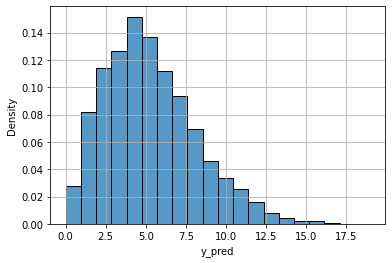

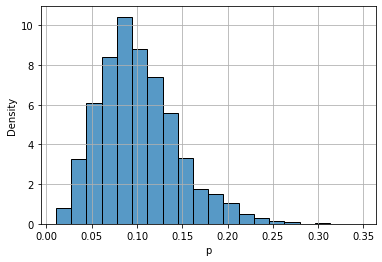

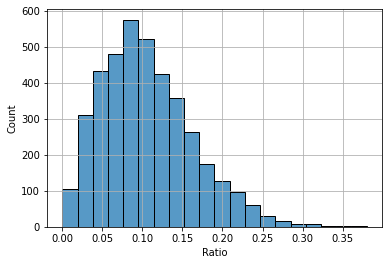

In [65]:
sns.histplot(data=samples_df, x='y_pred', stat='density', bins=20)
plt.grid(True)
plt.show()

sns.histplot(data=samples_df, x='p', stat='density', bins=20)
plt.grid(True)
plt.show()

sns.histplot(data=samples_df, x='Ratio', bins=20)
plt.grid(True)
plt.show()

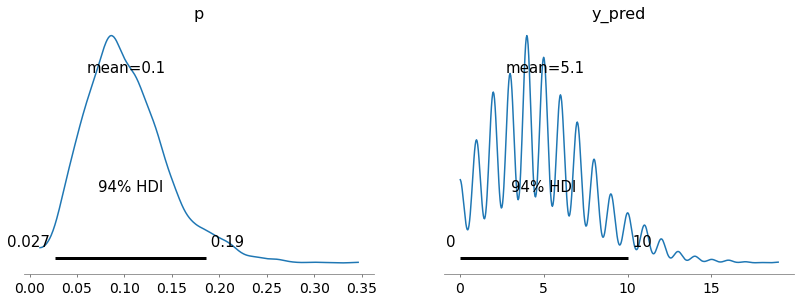

In [66]:
az.summary(samples, var_names=['p', 'y_pred'], hdi_prob=0.94)
az.plot_posterior(samples, var_names=['p', 'y_pred'], hdi_prob=0.94)
plt.show()


In [73]:
plr = np.sum(samples_df["Ratio"] < 0.2) / samples_df.shape[0] * 100
print(f"Probability that the Ratio is lower than the average: {plr:.4f}%")


Probability that the Ratio is lower than the average: 91.2250%
